# Child Class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


## Data

In [2]:
child_data = pd.read_csv('./Dataset_Proyek/child_data_rev.csv')
child_data.head()

,Name,Sex,Age,Height,Weight,Status
0,Ffion Winter,Female,5,100,11,Underweight
1,Anya Singleton,Female,3,97,15,Normal
2,Elisha Acevedo,Female,3,100,18,Overweight
3,Caroline Miles,Female,3,77,12,Stunting
4,Bryony Cameron,Female,1,94,10,Normal


In [3]:
child_data.shape

(201, 6)

In [4]:
child_data.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Status    0
dtype: int64

In [5]:
child_data.drop(['Name'], axis= 1, inplace = True)
child_data.head()

,Sex,Age,Height,Weight,Status
0,Female,5,100,11,Underweight
1,Female,3,97,15,Normal
2,Female,3,100,18,Overweight
3,Female,3,77,12,Stunting
4,Female,1,94,10,Normal


In [6]:
child_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     201 non-null    object
 1   Age     201 non-null    int64 
 2   Height  201 non-null    int64 
 3   Weight  201 non-null    int64 
 4   Status  201 non-null    object
dtypes: int64(3), object(2)
memory usage: 8.0+ KB


In [7]:
child_data.describe()

,Age,Height,Weight
count,201.000000,201.000000,201.000000
mean,2.920398,92.223881,14.074627
std,1.394142,11.787902,3.611011
min,1.000000,70.000000,7.000000
25%,2.000000,82.000000,11.000000
50%,3.000000,93.000000,14.000000
75%,4.000000,100.000000,17.000000
max,5.000000,117.000000,22.000000


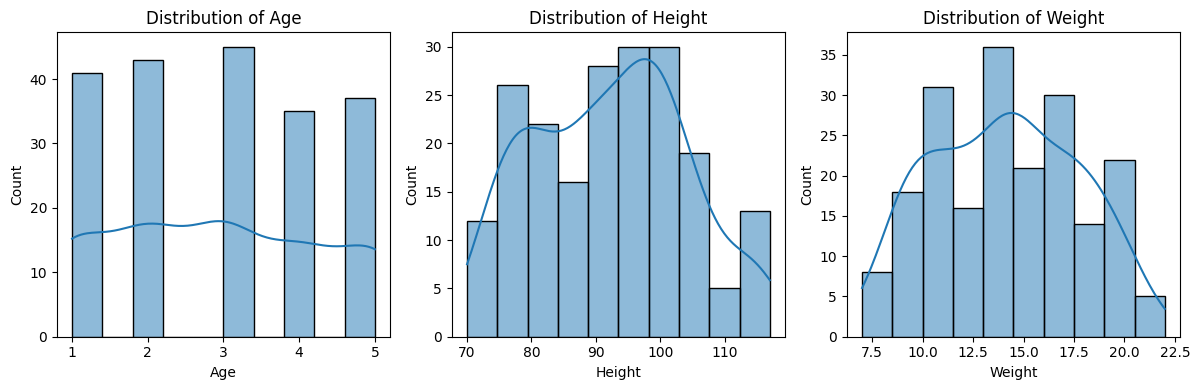

In [8]:
# Histogram untuk umur, tinggi, dan berat badan
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(child_data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(child_data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')

plt.subplot(1, 3, 3)
sns.histplot(child_data['Weight'], bins=10, kde=True)
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

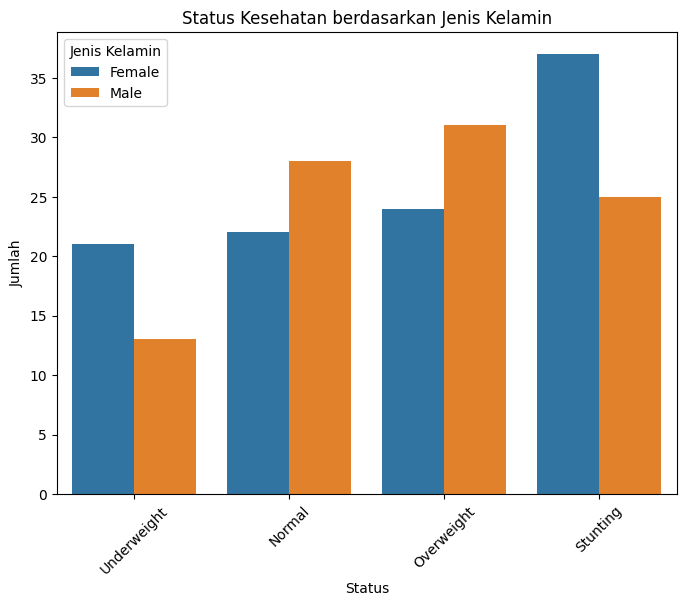

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', hue='Sex', data=child_data)
plt.title('Status Kesehatan berdasarkan Jenis Kelamin')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)
plt.show()

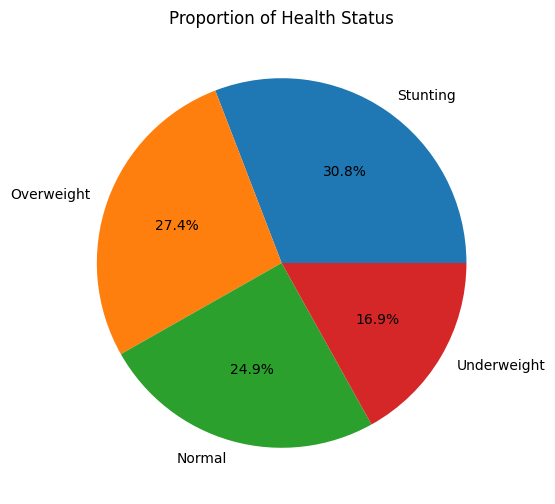

In [10]:
# Pie chart status kesehatan
status_counts = child_data['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Health Status')
plt.show()

## Mengecek Outlier

<Figure size 640x480 with 0 Axes>

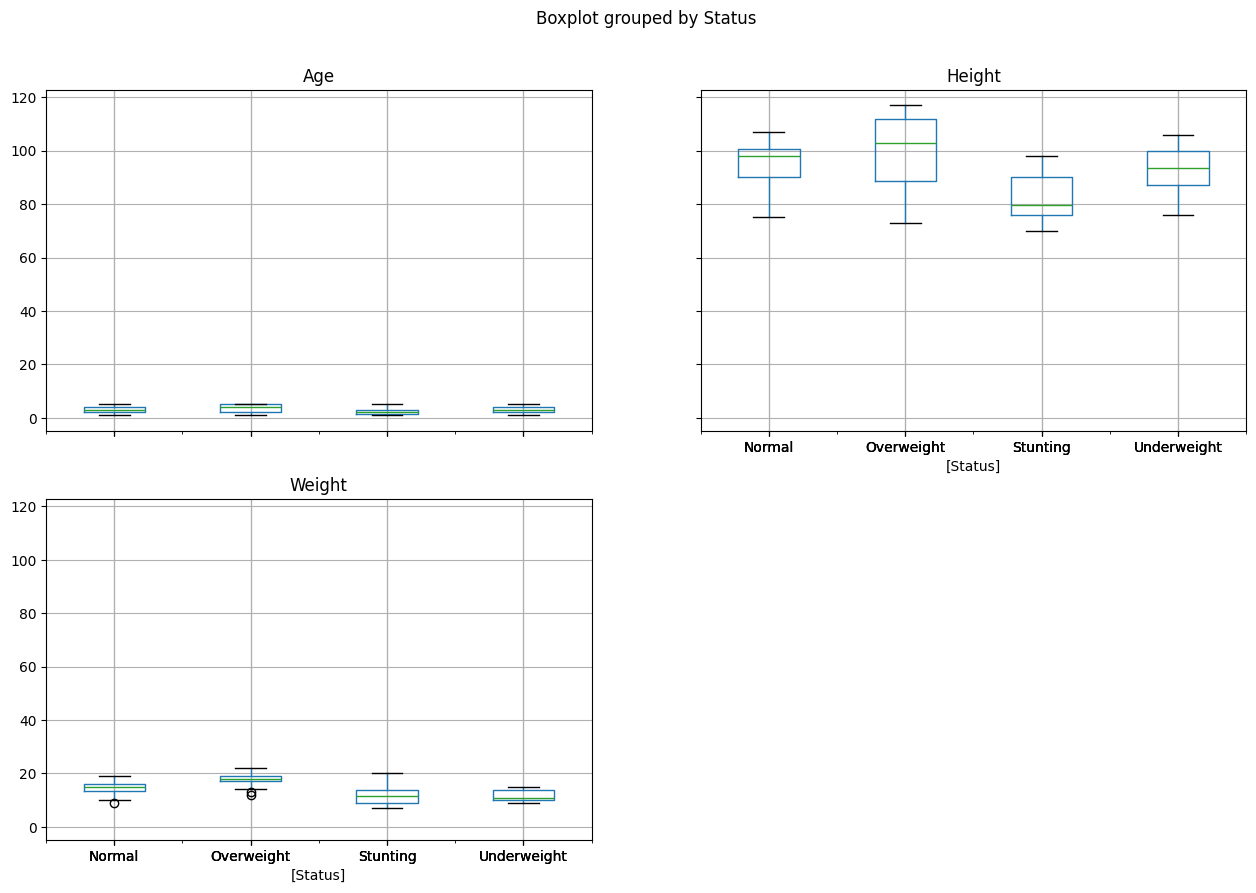

In [12]:
# Box plot untuk umur, tinggi, dan berat badan
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=child_data[['Age', 'Height', 'Weight']])
# plt.title('Box plot of Age, Height, and Weight')
# plt.show()

plt.figure()
child_data.boxplot(by="Status", figsize=(15, 10))
plt.show()


## Scatter Plot

In [ ]:
child_data['Status'].value_counts()

In [ ]:
colors = ['red', 'blue', 'green', 'yellow']
status = ['Stunting', 'Normal', 'Overweight', 'Underweight']

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Weight'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.legend()

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Weight'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Weight (kg)')
plt.legend()

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Sex'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Sex')
plt.ylabel('Height (cm)')
plt.legend()

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Sex'], x['Weight'], c = colors[i], label = status[i])

plt.xlabel('Sex')
plt.ylabel('Weight (kg)')
plt.legend()

In [ ]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Sex'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()

## Correlation Matrix

### Label Encoder

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

In [ ]:
child_data.columns

In [ ]:
child_data['Sex'] = le.fit_transform(child_data['Sex'])
child_data.head()

In [ ]:
child_data_corr = child_data.drop(columns= ['Status'])

In [ ]:
corr = child_data_corr.corr()
fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

In [ ]:
child_data['Status'] = le.fit_transform(child_data['Status'])
child_data.head()

In [ ]:
child_data.tail()

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
# 80 train
# 20 test

X = child_data.drop(columns=['Status'])  # fitur
y = child_data['Status'] # Target
# Penskalaan fitur numerik
scaler = StandardScaler()
numeric_columns = ['Age', 'Height', 'Weight']
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
# y = child_data['Status'] # Target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# model = LogisticRegression(max_iter=1000)

In [ ]:
#Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()

In [ ]:
#KNN
# from sklearn.neighbors import KNeighborsClassifier

# k = 5  # Jumlah tetangga terdekat yang akan dipertimbangkan
# model = KNeighborsClassifier(n_neighbors=k)  # Inisialisasi model dengan K=5

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [ ]:
# SVM
# from sklearn import svm
# model = svm.SVC()

In [ ]:
# Naive Bayes
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()

In [ ]:
# Train Model
model.fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)